<a href="https://colab.research.google.com/github/varsha730/data-collection-preparation/blob/main/Copy_of_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import necessary Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [ ]:
#read_csv is a pandas function to read csv files
data = pd.read_csv('Admission_Predict.csv')

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
data.head
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [ ]:
data=data.rename(columns = {'chance od Admit': 'Chance of Admit'})

In [ ]:
data.isnull().any()

Serial No.           False
GRE Score            False
TOEFL Score          False
University Rating    False
SOP                  False
LOR                  False
CGPA                 False
Research             False
Chance of Admit      False
dtype: bool

In [ ]:
data.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Chance of Admit,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


In [ ]:
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

In [ ]:
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [ ]:
sns.pairplot(data=data,hue='Research',markers=["^","v"],palette='inferno')

<Axes: xlabel='University Rating', ylabel='CGPA'>

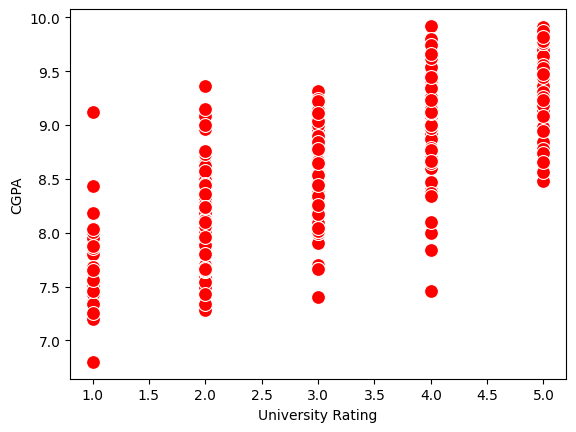

In [ ]:
sns.scatterplot(x='University Rating',y='CGPA',data=data,color='Red', s=100)

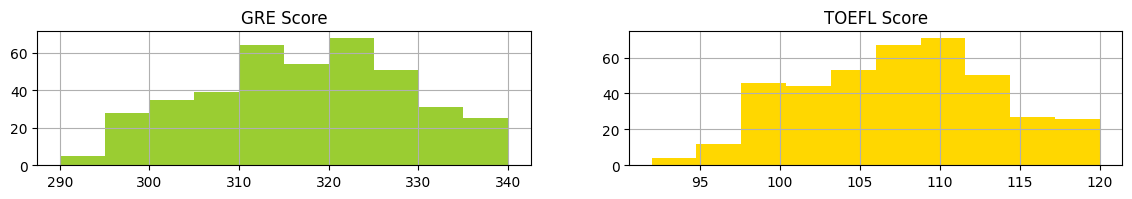

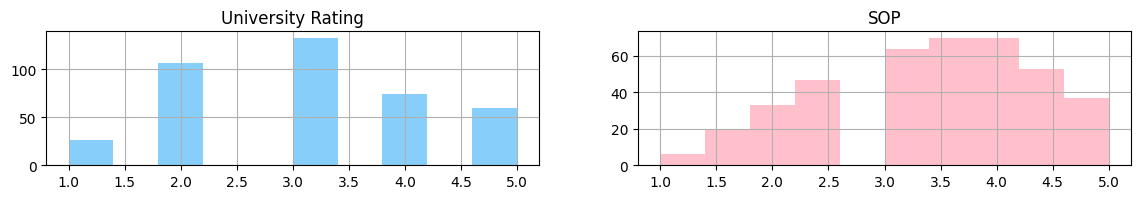

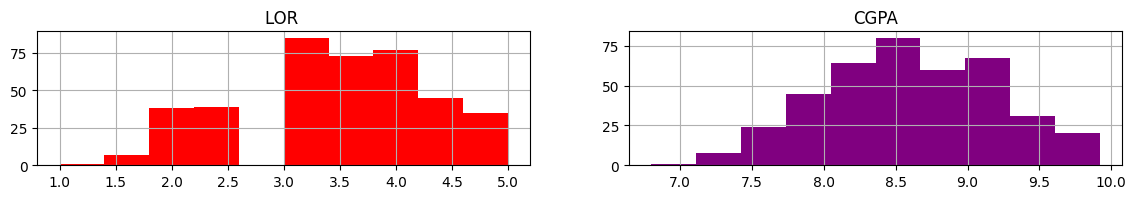

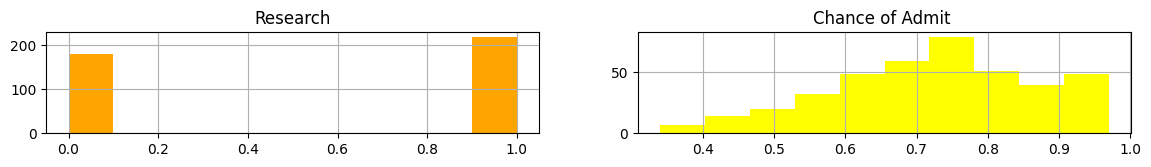

In [ ]:
category=['GRE Score','TOEFL Score','University Rating','SOP','LOR ','CGPA','Research','Chance of Admit ']
color=['yellowgreen','gold','lightskyblue','pink','red','purple','orange','yellow']
start=True 
for i in np.arange(4):
  fig=plt.figure(figsize=(14,8))
  plt.subplot2grid((4,2),(i,0))
  data[category[2*i]].hist(color=color[2*i],bins=10)
  plt.title(category[2*i])
  plt.subplot2grid((4,2),(i,1))
  data[category[2*i+1]].hist(color=color[2*i+1],bins=10)
  plt.title(category[2*i+1])

plt.subplots_adjust(hspace=0.7, wspace= 0.2)
plt.show()

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
print('Mean CGPA Score is :' ,int(data['CGPA'].mean()))
print('Mean GRE Score is :' , int(data['GRE Score'].mean()))
print('Mean TOEFL Score is :',int(data['TOEFL Score'].mean()))


Mean CGPA Score is : 8
Mean GRE Score is : 316
Mean TOEFL Score is : 107


In [ ]:
data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [ ]:
x=data.iloc[:,0:-1].values
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   9.65,   1.  ],
       [  2.  , 324.  , 107.  , ...,   4.5 ,   8.87,   1.  ],
       [  3.  , 316.  , 104.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [398.  , 330.  , 116.  , ...,   4.5 ,   9.45,   1.  ],
       [399.  , 312.  , 103.  , ...,   4.  ,   8.78,   0.  ],
       [400.  , 333.  , 117.  , ...,   4.  ,   9.66,   1.  ]])

In [ ]:
y=data['Chance of Admit '].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
x=sc.fit_transform(x)
x

array([[0.        , 0.94      , 0.92857143, ..., 0.875     , 0.91346154,
        1.        ],
       [0.00250627, 0.68      , 0.53571429, ..., 0.875     , 0.66346154,
        1.        ],
       [0.00501253, 0.52      , 0.42857143, ..., 0.625     , 0.38461538,
        1.        ],
       ...,
       [0.99498747, 0.8       , 0.85714286, ..., 0.875     , 0.84935897,
        1.        ],
       [0.99749373, 0.44      , 0.39285714, ..., 0.75      , 0.63461538,
        0.        ],
       [1.        , 0.86      , 0.89285714, ..., 0.75      , 0.91666667,
        1.        ]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20,random_state=42)

In [ ]:
#random_state actsas the seed for the random number generator during the split
y_train.shape
x_train
y_train=(y_train>0.5)
y_train
y_test=(y_test>0.5)
y_test

array([ True,  True,  True,  True, False,  True, False, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True])

In [ ]:
#model building - Logistic Regression
def logreg(x_train,x_test,y_train,y_test):
    lr = LogisticRegression(random_state=0)
    lr.fit(x_train,y_train)
    y_lr_tr = lr.predict(x_train)
    print(accuracy_score(y_lr_tr,y_train))
    ypred_lr = lr.predict(x_test)
    print(accuracy_score(ypred_lr,y_test))
    print("***Logistic Regression***")
    print("Confusion_Matrix")
    print(confusion_matrix(y_test,ypred_lr))
    print("Classification Report")
    print(classification_report(y_test,ypred_lr))

In [ ]:
#printing the train accuracy and test accuracy respectively
logreg(x_train,x_test,y_train,y_test)

0.928125
0.875
***Logistic Regression***
Confusion_Matrix
[[ 0 10]
 [ 0 70]]
Classification Report
              precision    recall  f1-score   support

       False       0.00      0.00      0.00        10
        True       0.88      1.00      0.93        70

    accuracy                           0.88        80
   macro avg       0.44      0.50      0.47        80
weighted avg       0.77      0.88      0.82        80



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#testing on test & random input values
lr = LogisticRegression(random_state=0)
lr.fit(x_train,y_train)
print("Predicting on the test values")
lr_Pred = lr.predict(x_test)
print("Output is: ",lr_Pred)
print("Prediction on random input")
lr_pred_own = lr.predict(sc.transform([[337, 118, 4,5, 4.5, 4.5, 9.65, 1]]))
print("Output is: ",lr_pred_own)

Predicting on the test values
Output is:  [ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True]
Prediction on random input
Output is:  [False]


In [ ]:
#model building - Decision Tree classifier
def decisionTree(x_train,x_test,y_train,y_test):
    dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
    dtc.fit(x_train,y_train)
    y_dt_tr = dtc.predict(x_train)
    print(accuracy_score(y_dt_tr,y_train))
    yPred_dt = dtc.predict(x_test)
    print(accuracy_score(yPred_dt,y_test))
    print("***Decision Tree***")
    print("confusion_matrix")
    print(confusion_matrix(y_test,yPred_dt))
    print("classification Report")
    print(classification_report(y_test,yPred_dt))

In [ ]:
#printing the train accuracy and test accuracy respectively
decisionTree(x_train,x_test,y_train,y_test)

1.0
0.8875
***Decision Tree***
confusion_matrix
[[ 7  3]
 [ 6 64]]
classification Report
              precision    recall  f1-score   support

       False       0.54      0.70      0.61        10
        True       0.96      0.91      0.93        70

    accuracy                           0.89        80
   macro avg       0.75      0.81      0.77        80
weighted avg       0.90      0.89      0.89        80



In [ ]:
#testing on test & random inputvalues
dtc = DecisionTreeClassifier(criterion="entropy",random_state=0)
dtc.fit(x_train,y_train)
print("Prediction on test values")
dtc_Pred =dtc.predict(x_test)
print("output is: ",dtc_Pred)
print("Predicting on random input")
dtc_pred_own = dtc.predict(sc.transform([[337,118,4,5,4.5,4.5,9.65,1]]))
print("Output is: ",dtc_pred_own)


Prediction on test values
output is:  [ True  True  True  True False  True  True False  True  True  True  True
 False  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True False  True
  True False  True False False  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True]
Predicting on random input
Output is:  [ True]


In [ ]:
#modelbuilding - Random Forest Classifier
def RandomForest(x_train,x_test,y_train,y_test):
          rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
          rf.fit(x_train,y_train)
          y_rf_tr = rf.predict(x_train)
          print(accuracy_score(y_rf_tr,y_train))
          ypred_rf = rf.predict(x_test)
          print(accuracy_score(ypred_rf,y_test))
          print("***Random Forest***")
          print("Confusion_Mtrix")
          print(confusion_matrix(y_test,ypred_rf))
          print("Classification Report")
          print(classification_report(y_test,ypred_rf))
          

In [ ]:
RandomForest(x_train,x_test,y_train,y_test)


0.996875
0.925
***Random Forest***
Confusion_Mtrix
[[ 6  4]
 [ 2 68]]
Classification Report
              precision    recall  f1-score   support

       False       0.75      0.60      0.67        10
        True       0.94      0.97      0.96        70

    accuracy                           0.93        80
   macro avg       0.85      0.79      0.81        80
weighted avg       0.92      0.93      0.92        80



In [ ]:
rf = RandomForestClassifier(criterion="entropy",n_estimators=10,random_state=0)
rf.fit(x_train,y_train)
print("Predicting on test values")
rf_pred =rf.predict(x_test)
print("output is: ",rf_pred)
print("Predicting on random input")
rf_pred_own = rf.predict(sc.transform([[337,118,4,5,4.5,4.5,9.65,1]]))
print("output is: ",rf_pred_own)

Predicting on test values
output is:  [ True  True  True  True False  True  True False  True  True  True  True
  True  True  True  True  True False  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True False  True  True  True  True  True]
Predicting on random input
output is:  [ True]


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units=7, activation='relu', input_dim=7))

In [ ]:
classifier.add(Dense(units=1, activation='relu'))

In [ ]:
classifier.add(Dense(units=1, activation='linear'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model = classifier.fit(x_train, y_train, batch_size= 10, validation_split= 0.33, epochs=10 )

Epoch 1/10


ValueError: ignored

In [ ]:
ann_pred = classifier.predict(x_test)
ann_pred = (ann_pred>0.5)
print(accuracy_score(ann_pred,y_test))
print("***ANN Model***")
print("Confussion_Matix")
print(confusion_matrix(y_test,ann_pred))
print("Classification Report")
print(classification_report(y_test,ann_pred))


ValueError: ignored

In [ ]:
pickle.dump(lr,open('university.pkl','wb'))